# Chicago Public School Data Analysis and Data Visualization - High Schools
### What attributes seem to be most correlated with a school's performance?
In this code, we will be doing a data analysis on Chicago Public Schools to provide insight to the attributes that are most indicative or correlated with how a student is likely to perform in school. It will be focused on data visualizations with a statistical approach to interpretations.

Table of Contents:
- 1) Data Collection 
- 2) Exploratory Data Analysis and Preprocessing
- 4) Statistic Analysis and Data Visualization

#### Data Collection
We can download the public dataset from Kaggle.com at https://www.kaggle.com/chicago/chicago-public-schools-data?select=chicago-public-schools-high-school-progress-report-2013-2014.csv

At this time, the data has elementary and high school progress reports from 2013-2014. We will be focusing on just the high school data. However, we will utilize machine learning workflow pipeline practices to allow for scalability into other datasets such as the elementary CPS data. 

In [1]:
import pandas as pd

# Import data from csv file
df = pd.read_csv('chicago-public-schools-high-school-progress-report-2013-2014.csv')
print(f'This is the dateframe shape: {df.shape}')
print('These are the columns:')
print(df.columns)
print(df.head(5))

This is the dateframe shape: (188, 103)
These are the columns:
Index(['School ID', 'Name of School', 'Street Address', 'City', 'State',
       'ZIP Code', 'Phone Number', 'Website', 'Blue Ribbon Award',
       'CPS Performance Policy Level',
       ...
       'Y Coordinate', 'Longitude', 'Latitude', 'Location',
       'Boundaries - ZIP Codes', 'Community Areas', 'Zip Codes',
       'Census Tracts', 'Wards', 'Historical Wards 2003-2015'],
      dtype='object', length=103)
   School ID                                    Name of School  \
0     610572                   Camelot Safe Academy Elementary   
1     400133           YCCS-Innovations of Arts Integration HS   
2     400148  Instituto Justice and Leadership Acad Charter HS   
3     609761                      George H Corliss High School   
4     609716                           Kelvyn Park High School   

            Street Address     City State  ZIP Code     Phone Number  \
0           125 S Clark St  Chicago    IL     60603  (7

#### Exploratory Data Analysis and Preprocessing

There are 188 rows or data observations and a staggering 103 columns or features/attributes. 

We will:
1) drop duplicate values
2) check with columns that have null values and drop those
3) trim the columns/attributes with what we believe, within reason, that should have no correlation with school performance (a priori knowledge)

In [2]:
# Drop duplicates
df = df.drop_duplicates()
print(f'Number of rows after dropping dupes: {df.shape}')

# Check which columns have null values
null_list = df.columns[df.isna().any()]
print(null_list)

Number of rows after dropping dupes: (188, 103)
Index(['Phone Number', 'Blue Ribbon Award', 'CPS Performance Policy Level',
       'CPS Performance Policy Status', 'Probation Length',
       'Student Response Rate', 'Teacher Response Rate', 'School Community',
       'Parent-Teacher Partnership', 'Quality of Facilities',
       'NWEA Reading Growth Percentile All Grades',
       'NWEA Reading Growth Percentile Grade 3',
       'NWEA Reading Growth Percentile Grade 4',
       'NWEA Reading Growth Percentile Grade 5',
       'NWEA Reading Growth Percentile Grade 6',
       'NWEA Reading Growth Percentile Grade 7',
       'NWEA Reading Growth Percentile Grade 8', 'NWEA Math Growth All Grades',
       'NWEA Math Growth Grade 3', 'NWEA Math Growth Grade 4',
       'NWEA Math Growth Grade 5', 'NWEA Math Growth Grade 6',
       'NWEA Math Growth Grade 7', 'NWEA Math Growth Grade 8',
       'NWEA Reading Attainment Percentile All Grades',
       'NWEA Reading Attainment Percentile Grade 2',
  

The number of columns with null values are larger than expected. We have several options for missing values. 

We could either:
- Take the average for that column and fill the missing values in (imputation)
- Remove the data point/row with the missing value from the dataset
- Predict the value with regression or k-NN

This usually depends on how many missing values we have for that particular column so we will use a mixed approach. 

We will first select the columns that have more than 30% of its data missing and remove those columns. Data missing more than 10% will likely have bias. 

Then we will remove columns with a priori assumptions of it's correlation.

<function matplotlib.pyplot.show(close=None, block=None)>

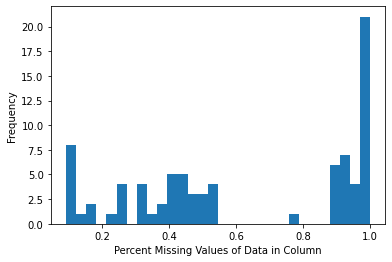

In [8]:
import matplotlib.pyplot as plt

# Show all rows
#pd.set_option("display.max_rows", None)

# Percentage of null values per column
null_list = df.columns[df.isna().any()] # Pull out all columns with nulls
null_list = df[null_list.to_numpy()].isna().sum()/df.shape[0]

# Using a histogram to see the distribution of missing values
null_hist = plt.hist(null_list, bins=30)
plt.xlabel('Percent Missing Values of Data in Column')
plt.ylabel('Frequency')
plt.show

We can see that of columns that have missing values, the largest portion of them are missing all of their values (the 1.0 bin).

Using this distribution of missing values, we will drop columns that are missing 50% or more of their values to retain columns that may still work well after we impute the missing values.

In [9]:
# Remove columns with too many missing values
threshold = 0.5
nan_list = df.columns[df.isna().sum() >= (threshold * df.shape[0])]
print(nan_list)

Index(['Blue Ribbon Award', 'Probation Length',
       'NWEA Reading Growth Percentile All Grades',
       'NWEA Reading Growth Percentile Grade 3',
       'NWEA Reading Growth Percentile Grade 4',
       'NWEA Reading Growth Percentile Grade 5',
       'NWEA Reading Growth Percentile Grade 6',
       'NWEA Reading Growth Percentile Grade 7',
       'NWEA Reading Growth Percentile Grade 8', 'NWEA Math Growth All Grades',
       'NWEA Math Growth Grade 3', 'NWEA Math Growth Grade 4',
       'NWEA Math Growth Grade 5', 'NWEA Math Growth Grade 6',
       'NWEA Math Growth Grade 7', 'NWEA Math Growth Grade 8',
       'NWEA Reading Attainment Percentile All Grades',
       'NWEA Reading Attainment Percentile Grade 2',
       'NWEA Reading Attainment Percentile Grade 3',
       'NWEA Reading Attainment Percentile Grade 4',
       'NWEA Reading Attainment Percentile Grade 5',
       'NWEA Reading Attainment Percentile Grade 6',
       'NWEA Reading Attainment Percentile Grade 7',
       'NWEA

In [10]:
# Remove columns
df = df.drop(columns=nan_list.to_numpy())

# Print and show the remaining columns
df.columns

Index(['School ID', 'Name of School', 'Street Address', 'City', 'State',
       'ZIP Code', 'Phone Number', 'Website', 'CPS Performance Policy Level',
       'CPS Performance Policy Status', 'My Voice, My School Overall Rating',
       'Student Response Rate', 'Teacher Response Rate', 'Involved Family',
       'Supportive Environment', 'Ambitious Instruction', 'Effective Leaders',
       'Collaborative Teachers', 'Safe', 'School Community',
       'Parent-Teacher Partnership', 'Quality of Facilities',
       'Healthy Schools Certification', 'Creative Schools Certification',
       'EPAS Growth Percentile', 'EXPLORE Growth Percentile Grade 9',
       'Plan Growth Percentile Grade 10', 'ACT Growth Percentile Grade 11',
       'EPAS Attainment Percentile', 'EXPLORE Attainment Percentile Grade 9',
       'PLAN Attainment Percentile Grade 10',
       'Grade ACT Attainment Percentile Grade 11',
       'EXPLORE Spring 2013 Average Grade 9',
       'EXPLORE Spring 2013 Average Grade 10',
     

Now we will analyze these columns to see whether we should remove that data point/row, impute the values in the columns, or remove the column with a priori assumptions of its correlation.

In [12]:
# Check missing values
df.isna().sum() / df.shape[0]

School ID                                                 0.000000
Name of School                                            0.000000
Street Address                                            0.000000
City                                                      0.000000
State                                                     0.000000
ZIP Code                                                  0.000000
Phone Number                                              0.090426
Website                                                   0.000000
CPS Performance Policy Level                              0.250000
CPS Performance Policy Status                             0.250000
My Voice, My School Overall Rating                        0.000000
Student Response Rate                                     0.101064
Teacher Response Rate                                     0.101064
Involved Family                                           0.000000
Supportive Environment                                    0.00